### Light GBM

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from src.paths import TRANSFORMED_DATA_DIR
from src.split_and_tfidf import split_and_vect
from src.stemming_and_lemming import stem_reviews, get_wordnet_pos, lemmatize_reviews

In [4]:
# read in cleaned data
df = pd.read_parquet(TRANSFORMED_DATA_DIR /'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


In [5]:
# make a copy
df_copy = df.copy()

In [6]:
from lightgbm import LGBMClassifier

# split data
X_train, X_test, y_train, y_test, tfidf_lem = split_and_vect(df_copy, 'cleaned', 'recommended')

# lgbm classifier
lgbm = LGBMClassifier()

# fit
lgbm.fit(X_train, y_train)

# predict
y_pred = lgbm.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1178, number of negative: 1937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60118
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 2113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378170 -> initscore=-0.497322
[LightGBM] [Info] Start training from score -0.497322
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       503
           1       0.83      0.86      0.84       276

    accuracy                           0.88       779
   macro avg       0.87      0.88      0.87       779
weighted avg       0.89      0.88      0.88       779



c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


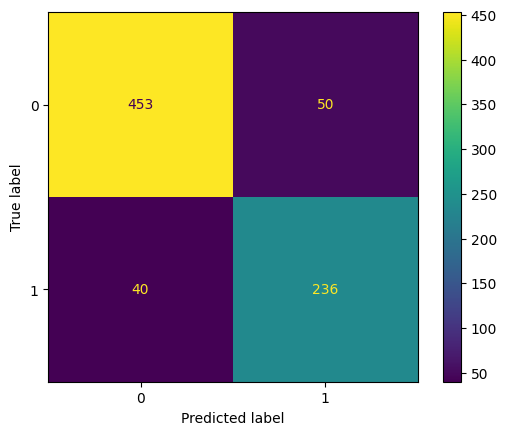

In [7]:
ConfusionMatrixDisplay.from_estimator(lgbm, X_test, y_test)

#### Stemming

In [8]:
df_stem = df_copy.copy()
df_stem['stem'] = stem_reviews(df_stem['cleaned'])

In [9]:
df_stem.head()


,recommended,cleaned,stem
0,1,Very good flight following an equally good fli...,veri good flight follow an equal good flight t...
1,1,An hours delay due to late arrival of the inco...,an hour delay due to late arriv of the incom a...
2,0,I booked through BA because Loganair dont have...,i book through ba becaus loganair dont have re...
3,0,British airways lost bags in LHR then found th...,british airway lost bag in lhr then found them...
4,0,The check in process and reward loyalty progra...,the check in process and reward loyalti progra...


In [10]:
# split and vectorize
X_train_stem, X_test_stem, y_train, y_test, tfidf_stem_vec = split_and_vect(df_stem, 'stem', 'recommended')

# fit stemmed to sgd
# instantiate
lgbm_stem = LGBMClassifier()

# fit to the data
lgbm_stem.fit(X_train_stem, y_train)

# make predictions
y_pred_stem = lgbm_stem.predict(X_test_stem)


c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1178, number of negative: 1937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70201
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 2279
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378170 -> initscore=-0.497322
[LightGBM] [Info] Start training from score -0.497322


c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
# classification report
print(classification_report(y_test, y_pred_stem))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       503
           1       0.83      0.86      0.84       276

    accuracy                           0.89       779
   macro avg       0.88      0.88      0.88       779
weighted avg       0.89      0.89      0.89       779



c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


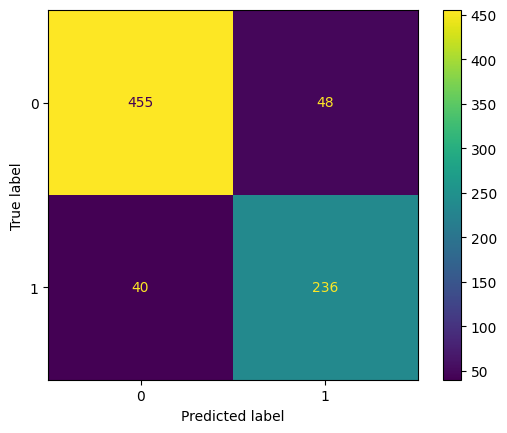

In [12]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(lgbm_stem, X_test_stem, y_test)